# Seatwork 11.1 Exploratory Data Analysis for Machine Learning

---

**Name**: Cuadra, Audrick Zander G.

**Section**: CPE22S3

**Date**: April 22, 2024

---

## Instructions:

- Download the datasets here:
- For Linear Regression Analysis: https://archive-beta.ics.uci.edu/dataset/10/automobileLinks to an external site.
- For Logistic Regression Analysis: https://archive-beta.ics.uci.edu/dataset/109/wine
- Perform exploratory data analysis (which must include data pre-processing/wrangling).
- Submit the notebook with the cleaned data and the EDA.

## Note:

- Your submission must be PDF file.
- However, submit the link of your python notebook and submit the link in the comments.

# Automobile

In [278]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [279]:
# Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [280]:
# showing a sample of the 'X' dataframe
X.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [281]:
# showing a sample of the 'y' dataframe
y.head()

,symboling
0,3
1,3
2,1
3,2
4,2


In [282]:
# importing all the necessary libraries
import pandas as pd
import numpy as np

# concatinating the 'X' and 'y' dataframe
autom_df = pd.concat([X, y], axis=1)
autom_df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [283]:
# creating a function that detects and displays the number of duplicates in the dataframe
def countDuplicate(data):
    if data.duplicated().any():
        count = data.duplicated().sum()
        print(count)
    else:
        return "No Duplicates Found!"

In [284]:
# checking if the concatinated dataframe has any duplicates
countDuplicate(autom_df)

'No Duplicates Found!'

In [285]:
# checking the number of nulls in the dataframe
autom_df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

In [286]:
autom_df['price'].value_counts()

price
8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: count, Length: 186, dtype: int64

In [287]:
autom_df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

In [288]:
# using mean to supply each columns that contains a null
autom_df['price'].fillna(autom_df['price'].median(), inplace=True)

In [289]:
autom_df['peak-rpm'].fillna(autom_df['peak-rpm'].median(), inplace=True)

In [290]:
autom_df['horsepower'].fillna(autom_df['horsepower'].median(), inplace=True)

In [291]:
autom_df['stroke'].fillna(autom_df['stroke'].median(), inplace=True)

In [292]:
autom_df['bore'].fillna(autom_df['bore'].median(), inplace=True)

In [293]:
autom_df['num-of-doors'].fillna(autom_df['num-of-doors'].median(), inplace=True)

In [294]:
autom_df['normalized-losses'].fillna(autom_df['normalized-losses'].median(), inplace=True)

In [295]:
# checking if there are still any nulls in the dataframe
autom_df.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

In [296]:
# checking all the categorical values
autom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           205 non-null    float64
 4   horsepower         205 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             205 non-null    float64
 7   bore               205 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [297]:
# This is to allow the access for the dataframe in which the int conversion hasn't occurred
autom_cat = autom_df.copy()

In [298]:
# creating a function that converts objects into numerical values
def preprocessing(data, catlist):
    if data[catlist].dtypes == 'object':
        cat_val = data[catlist].unique()
        range_val = range(1, len(cat_val)+1)
        map = dict(zip(cat_val, range_val))
        print(f"{catlist}:", map)
        data[catlist] = data[catlist].map(map)
    return data
for i in autom_df.select_dtypes(include=['object']).columns:
    preprocessing(autom_df, i)

fuel-system: {'mpfi': 1, '2bbl': 2, 'mfi': 3, '1bbl': 4, 'spfi': 5, '4bbl': 6, 'idi': 7, 'spdi': 8}
engine-type: {'dohc': 1, 'ohcv': 2, 'ohc': 3, 'l': 4, 'rotor': 5, 'ohcf': 6, 'dohcv': 7}
engine-location: {'front': 1, 'rear': 2}
drive-wheels: {'rwd': 1, 'fwd': 2, '4wd': 3}
body-style: {'convertible': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4, 'hardtop': 5}
aspiration: {'std': 1, 'turbo': 2}
fuel-type: {'gas': 1, 'diesel': 2}
make: {'alfa-romero': 1, 'audi': 2, 'bmw': 3, 'chevrolet': 4, 'dodge': 5, 'honda': 6, 'isuzu': 7, 'jaguar': 8, 'mazda': 9, 'mercedes-benz': 10, 'mercury': 11, 'mitsubishi': 12, 'nissan': 13, 'peugot': 14, 'plymouth': 15, 'porsche': 16, 'renault': 17, 'saab': 18, 'subaru': 19, 'toyota': 20, 'volkswagen': 21, 'volvo': 22}


In [299]:
# checking the values of the dataframe
autom_df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,1,130,...,88.6,1,1,1,2.0,1,1,1,115.0,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,1,130,...,88.6,1,1,1,2.0,1,1,1,115.0,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,1,152,...,94.5,1,1,2,2.0,1,1,1,115.0,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,1,109,...,99.8,1,2,3,4.0,1,1,2,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,1,136,...,99.4,1,3,3,4.0,1,1,2,164.0,2


<Axes: >

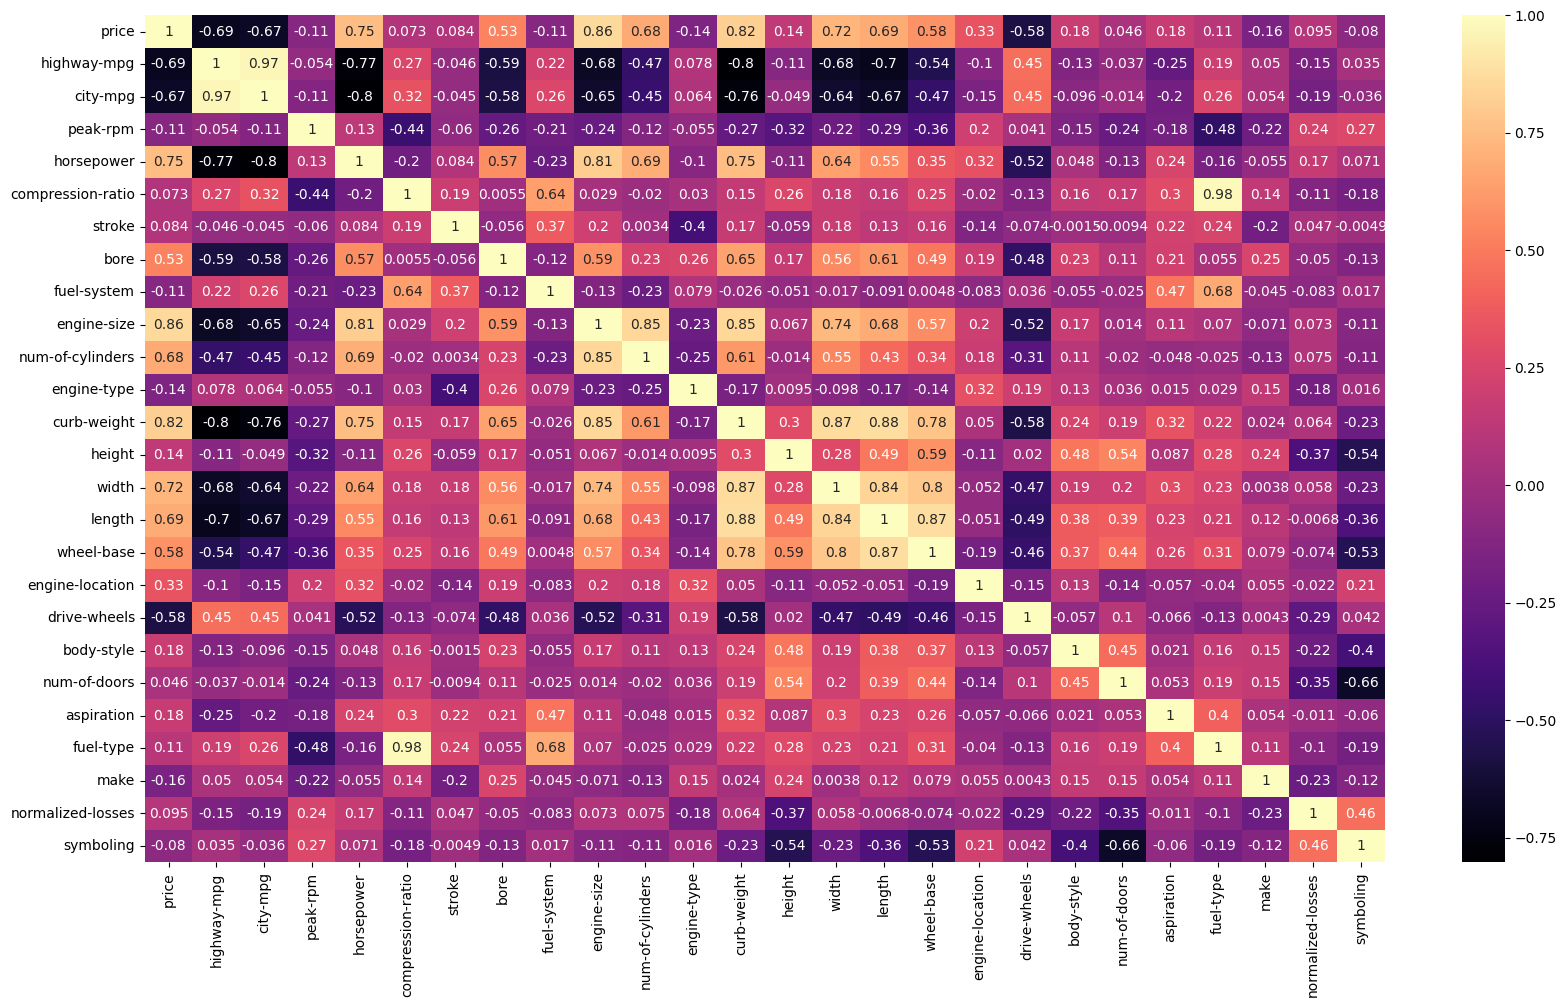

In [300]:
# importing the necessary libraries for plotting
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# creating a heatmap to check the correlation of each categories between one another
plt.figure(figsize=(20, 11))
sns.heatmap(autom_df.corr(), annot=True, cmap='magma')

## Linear Regression Model

In [301]:
X = autom_df.drop('price', axis=1)
y = autom_df['price']

In [302]:
print("X",X.shape,"\ny=",y.shape)

X (205, 25) 
y= (205,)


## Train Test Splitting

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [305]:
X_train.shape

(143, 25)

In [306]:
X_test.shape

(62, 25)

In [307]:
model = LinearRegression()

In [308]:
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [309]:
model.coef_

array([-1.50604087e+02,  7.37133859e+00,  1.16315603e+00, -2.93324387e+01,
        9.93470741e+02, -5.45481780e+03, -1.06091424e+04, -1.70268232e+02,
        2.05325227e+02, -3.00743877e+03, -5.28868529e+01,  1.41070253e+00,
        2.53044661e+02,  8.90488886e+02,  2.38868227e+01, -8.73652339e+01,
        1.54931808e+04, -2.22018286e+03, -4.10783975e+02,  3.27022203e+02,
        3.14166895e+03, -1.29759009e+04, -1.27546963e+02, -7.53386017e+00,
        3.34227339e+02])

In [310]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
highway-mpg,-150.604087
city-mpg,7.371339
peak-rpm,1.163156
horsepower,-29.332439
compression-ratio,993.470741
stroke,-5454.817804
bore,-10609.142408
fuel-system,-170.268232
engine-size,205.325227
num-of-cylinders,-3007.438769


## Prediction from our Model

In [311]:
y_pred = model.predict(X_test)

## Regression Evaluation Metrics

In [312]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [313]:
MAE

2554.5515500553283

In [314]:
MSE

14903114.988000777

In [315]:
RMSE

3860.4552824765083

In [316]:
autom_df['price'].mean()

13150.307317073171

## Residual Histogram

In [317]:
test_residual = y_test - y_pred

<Axes: ylabel='Density'>

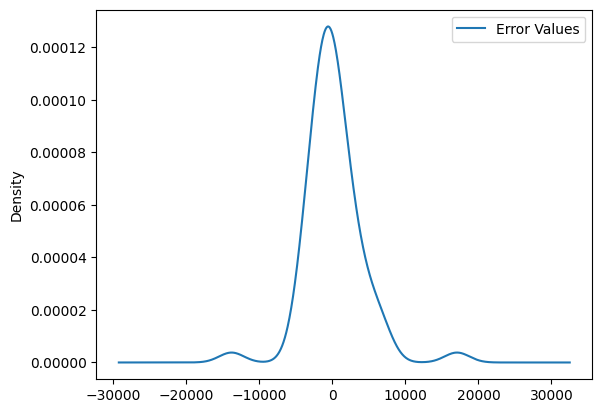

In [318]:
pd.DataFrame({'Error Values': (test_residual)}).plot.kde()

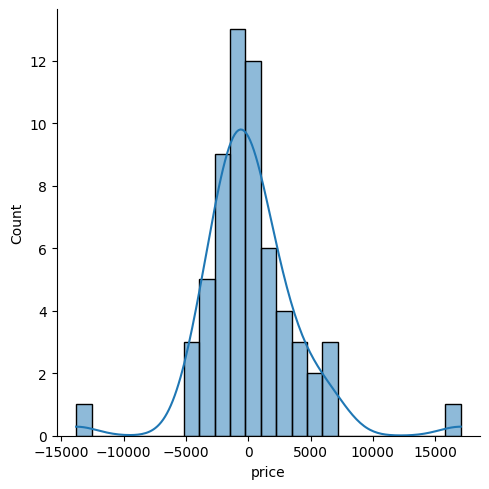

In [319]:
sns.displot(test_residual, bins=25, kde=True)

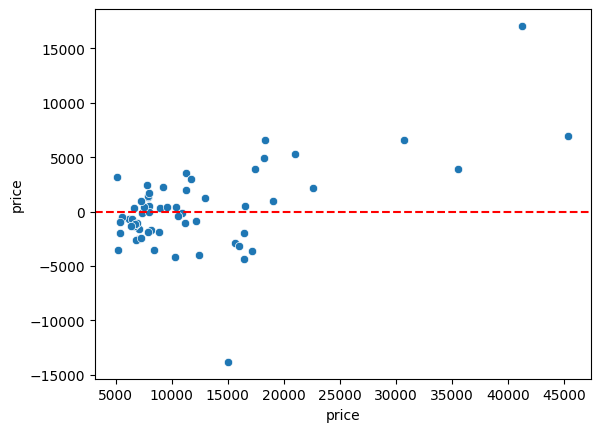

In [320]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='r', ls='--')

# Wine


In [325]:
# Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [326]:
# displaying the 'X' dataframe
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [327]:
# displaying the 'y' dataframe
y.head()

,class
0,1
1,1
2,1
3,1
4,1


In [328]:
# importing all the necessary libraries
import pandas as pd
import numpy as np

# concatinating all the 'X' and 'y' dataframe
wine_df = pd.concat([X, y], axis=1)
wine_df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [329]:
# checking if there are any duplicates
countDuplicate(wine_df)

'No Duplicates Found!'

In [330]:
# checking there are any nulls in the dataframe
wine_df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [331]:
# checking if there are any categorical values in the dataframe
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

<Axes: >

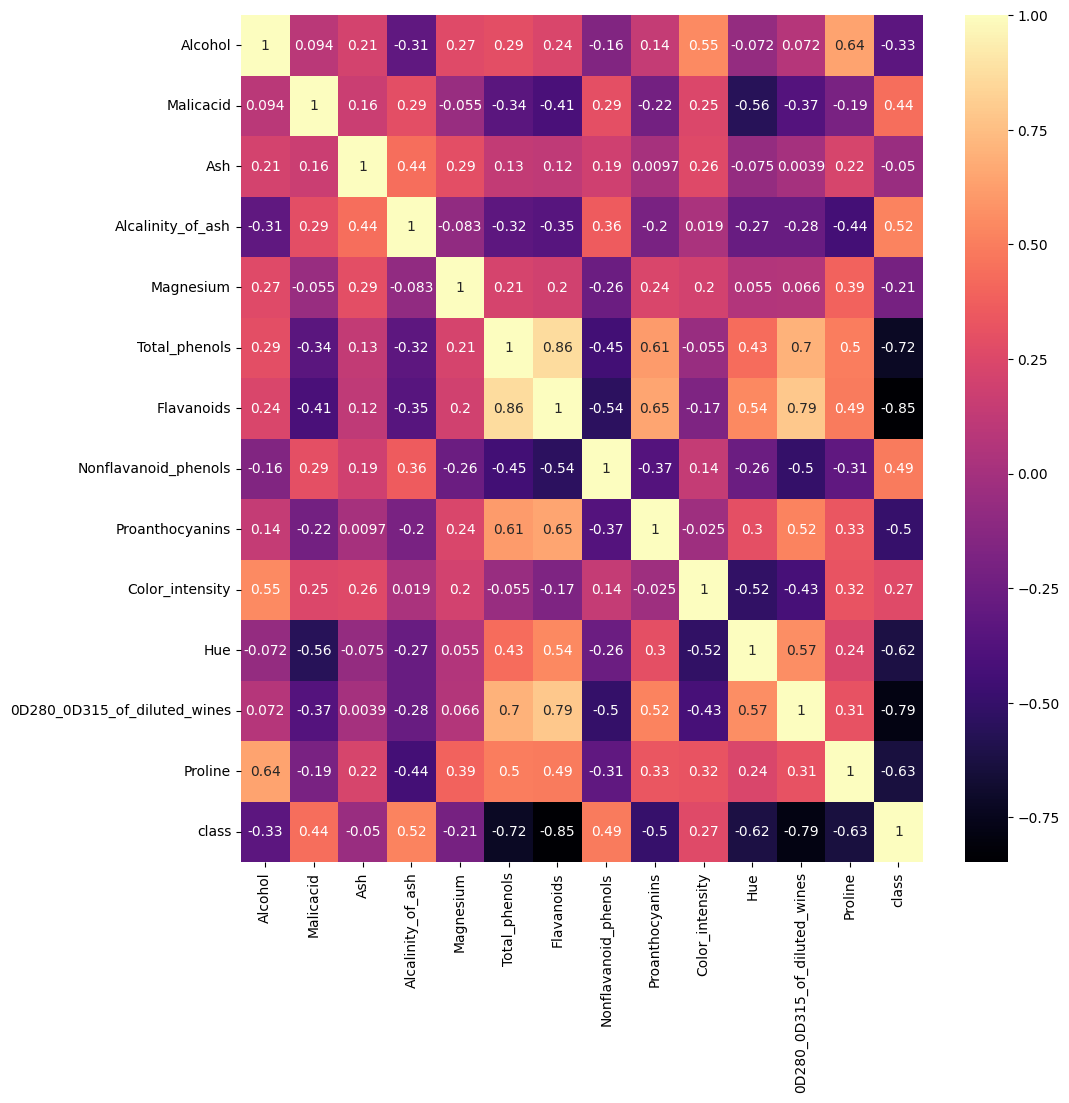

In [332]:
plt.figure(figsize=(11,11))
sns.heatmap(wine_df.corr(), annot=True, cmap='magma')

## Logistic Regression

In [333]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [334]:
import warnings
warnings.filterwarnings('ignore')

In [335]:
print(round(wine_df.describe()),2)

       Alcohol  Malicacid    Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
count    178.0      178.0  178.0              178.0      178.0          178.0   
mean      13.0        2.0    2.0               19.0      100.0            2.0   
std        1.0        1.0    0.0                3.0       14.0            1.0   
min       11.0        1.0    1.0               11.0       70.0            1.0   
25%       12.0        2.0    2.0               17.0       88.0            2.0   
50%       13.0        2.0    2.0               20.0       98.0            2.0   
75%       14.0        3.0    3.0               22.0      107.0            3.0   
max       15.0        6.0    3.0               30.0      162.0            4.0   

       Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity  \
count       178.0                 178.0            178.0            178.0   
mean          2.0                   0.0              2.0              5.0   
std           1.0                   0.0

In [336]:
wine_df['Alcalinity_of_ash'].min()

10.6

Malicacid:
- Upper bound: 4.5 and Max: 6.0, potential upper bound outlier

Alcalinity_of_ash:
- Upper bound: 29.5 and Max: 30, potential upper bound outlier

Magnesium:
- Upper bound: 135.5 and Max: 162, potential upper bound outlier

Proanthocyanins
- Upper bound: 3.5 and Max: 4, potential upper bound outlier

Color_intensity:
- Upper bound: 10.5 and Max: 13, potential upper bound outlier

Hue:
- Upper bound: 1 and Max: 2, potential upper bound outlier
- Lower bound: 1 and Min: 0, potential lower bound outlier



Text(0, 0.5, 'Hue')

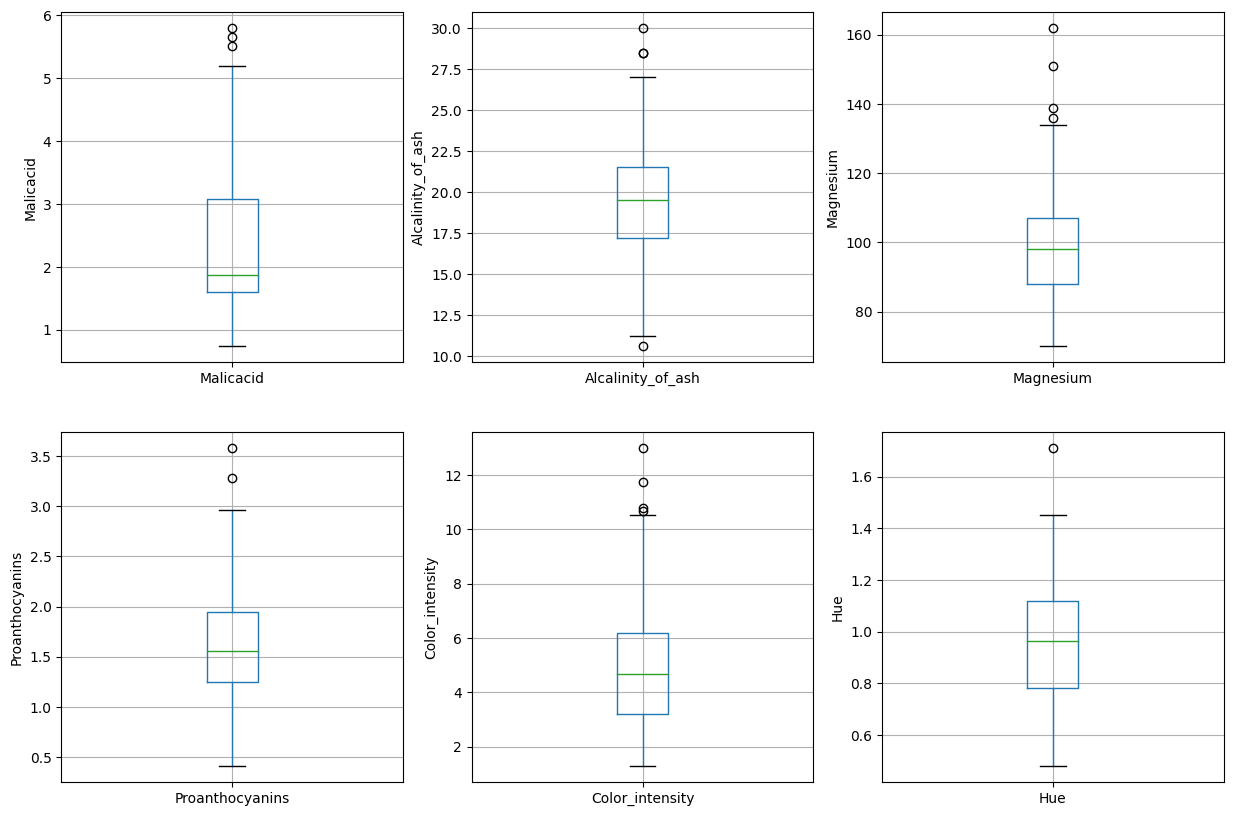

In [337]:
# draw boxplots to visualize the outliers
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
fig = wine_df.boxplot(column='Malicacid')
fig.set_title('')
fig.set_ylabel('Malicacid')

plt.subplot(2, 3, 2)
fig = wine_df.boxplot(column='Alcalinity_of_ash')
fig.set_title('')
fig.set_ylabel('Alcalinity_of_ash')

plt.subplot(2, 3, 3)
fig = wine_df.boxplot(column='Magnesium')
fig.set_title('')
fig.set_ylabel('Magnesium')

plt.subplot(2, 3, 4)
fig = wine_df.boxplot(column='Proanthocyanins')
fig.set_title('')
fig.set_ylabel('Proanthocyanins')

plt.subplot(2, 3, 5)
fig = wine_df.boxplot(column='Color_intensity')
fig.set_title('')
fig.set_ylabel('Color_intensity')

plt.subplot(2, 3, 6)
fig = wine_df.boxplot(column='Hue')
fig.set_title('')
fig.set_ylabel('Hue')

Text(0, 0.5, '')

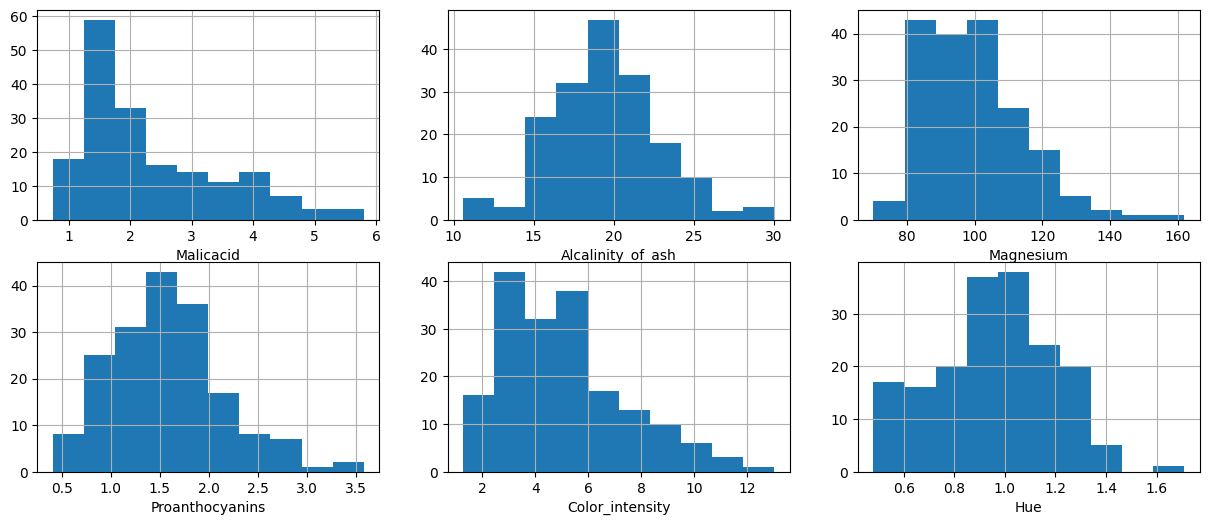

In [338]:
# plot histogram to check distribution
# this is to determine which step would be next
plt.figure(figsize=(15,6))

plt.subplot(2, 3, 1)
fig = wine_df.Malicacid.hist(bins=10)
fig.set_xlabel('Malicacid')
fig.set_ylabel('')

plt.subplot(2, 3, 2)
fig = wine_df.Alcalinity_of_ash.hist(bins=10)
fig.set_xlabel('Alcalinity_of_ash')
fig.set_ylabel('')

plt.subplot(2, 3, 3)
fig = wine_df.Magnesium.hist(bins=10)
fig.set_xlabel('Magnesium')
fig.set_ylabel('')

plt.subplot(2, 3, 4)
fig = wine_df.Proanthocyanins.hist(bins=10)
fig.set_xlabel('Proanthocyanins')
fig.set_ylabel('')

plt.subplot(2, 3, 5)
fig = wine_df.Color_intensity.hist(bins=10)
fig.set_xlabel('Color_intensity')
fig.set_ylabel('')

plt.subplot(2, 3, 6)
fig = wine_df.Hue.hist(bins=10)
fig.set_xlabel('Hue')
fig.set_ylabel('')

In [339]:
# since all 4 are skewed, next step would be interquartile range to find the outliers
IQR = wine_df['Malicacid'].quantile(0.75) - wine_df['Malicacid'].quantile(0.25)
Lower_fence = wine_df['Malicacid'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Malicacid'].quantile(0.75) + (IQR * 1.5)
print(f"Malicacid outliers are values < {Lower_fence}  or > {Upper_fence}")

Malicacid outliers are values < -0.6174999999999997  or > 5.3025


In [340]:
IQR = wine_df['Alcalinity_of_ash'].quantile(0.75) - wine_df['Alcalinity_of_ash'].quantile(0.25)
Lower_fence = wine_df['Alcalinity_of_ash'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Alcalinity_of_ash'].quantile(0.75) + (IQR * 1.5)
print(f"Alcalinity_of_ash outliers are values < {Lower_fence}  or > {Upper_fence}")

Alcalinity_of_ash outliers are values < 10.749999999999998  or > 27.950000000000003


In [341]:
IQR = wine_df['Magnesium'].quantile(0.75) - wine_df['Magnesium'].quantile(0.25)
Lower_fence = wine_df['Magnesium'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Magnesium'].quantile(0.75) + (IQR * 1.5)
print(f"Magnesium outliers are values < {Lower_fence}  or > {Upper_fence}")

Magnesium outliers are values < 59.5  or > 135.5


In [342]:
IQR = wine_df['Proanthocyanins'].quantile(0.75) - wine_df['Proanthocyanins'].quantile(0.25)
Lower_fence = wine_df['Proanthocyanins'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Proanthocyanins'].quantile(0.75) + (IQR * 1.5)
print(f"Proanthocyanins outliers are values < {Lower_fence}  or > {Upper_fence}")

Proanthocyanins outliers are values < 0.20000000000000018  or > 3.0


In [343]:
IQR = wine_df['Color_intensity'].quantile(0.75) - wine_df['Color_intensity'].quantile(0.25)
Lower_fence = wine_df['Color_intensity'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Color_intensity'].quantile(0.75) + (IQR * 1.5)
print(f"Color_intensity outliers are values < {Lower_fence}  or > {Upper_fence}")

Color_intensity outliers are values < -1.2500000000000009  or > 10.670000000000002


In [344]:
IQR = wine_df['Hue'].quantile(0.75) - wine_df['Hue'].quantile(0.25)
Lower_fence = wine_df['Hue'].quantile(0.25) - (IQR * 1.5)
Upper_fence = wine_df['Hue'].quantile(0.75) + (IQR * 1.5)
print(f"Hue outliers are values < {Lower_fence}  or > {Upper_fence}")

Hue outliers are values < 0.2762499999999998  or > 1.6262500000000002


In [345]:
# Declare feature vector and target variable
X = wine_df.drop(['class'], axis=1)
y = wine_df['class']

In [346]:
# Split data into seperate training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [347]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [348]:
X_train.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [349]:
categorical = [i for i in X_train.columns if X_train[i].dtypes=='O']
categorical

[]

Since there are no categorical values in the given dataset we would proceed with checking the nulls

In [350]:
X_train.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [351]:
X_test.isnull().any()

Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool

In [352]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Malicacid'] = max_value(df3, 'Malicacid', 5.30)
    df3['Alcalinity_of_ash'] = max_value(df3, 'Alcalinity_of_ash', 27.95)
    df3['Magnesium'] = max_value(df3, 'Magnesium', 135.5)
    df3['Proanthocyanins'] = max_value(df3, 'Proanthocyanins', 3)
    df3['Color_intensity'] = max_value(df3, 'Color_intensity', 10.67)
    df3['Hue'] = max_value(df3, 'Hue', 1.63)

In [353]:
X_train['Malicacid'].max(), X_test['Malicacid'].max()

(5.3, 5.3)

In [354]:
X_train['Alcalinity_of_ash'].max(), X_test['Alcalinity_of_ash'].max()

(27.95, 27.95)

In [355]:
X_train['Magnesium'].max(), X_test['Magnesium'].max()

(135.5, 132.0)

In [356]:
X_train['Proanthocyanins'].max(), X_test['Proanthocyanins'].max()

(3.0, 2.45)

In [357]:
X_train['Color_intensity'].max(), X_test['Color_intensity'].max()

(10.67, 10.67)

In [358]:
X_train['Hue'].max(), X_test['Hue'].max()

(1.63, 1.38)

In [359]:
X_train.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.984859,2.368662,2.366901,19.536620,99.739437,2.258662,1.949155,0.363521,1.600000,5.021127,0.952789,2.586268,742.330986
std,0.807175,1.104345,0.269684,3.392529,13.154391,0.611691,0.975921,0.127709,0.574072,2.312173,0.228141,0.722643,303.784935
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.470000,0.130000,0.420000,1.280000,0.540000,1.270000,290.000000
25%,12.347500,1.602500,2.222500,17.250000,89.000000,1.705000,1.037500,0.270000,1.242500,3.102500,0.780000,1.875000,511.250000
50%,13.040000,1.895000,2.360000,19.500000,98.000000,2.210000,2.035000,0.340000,1.555000,4.600000,0.960000,2.760000,675.000000
75%,13.637500,3.222500,2.560000,21.500000,106.750000,2.735000,2.760000,0.450000,1.957500,6.275000,1.120000,3.167500,932.750000
max,14.750000,5.300000,3.220000,27.950000,135.500000,3.880000,3.740000,0.660000,3.000000,10.670000,1.630000,4.000000,1547.000000


In [360]:
# Feature scaling
X_train.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.984859,2.368662,2.366901,19.536620,99.739437,2.258662,1.949155,0.363521,1.600000,5.021127,0.952789,2.586268,742.330986
std,0.807175,1.104345,0.269684,3.392529,13.154391,0.611691,0.975921,0.127709,0.574072,2.312173,0.228141,0.722643,303.784935
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.470000,0.130000,0.420000,1.280000,0.540000,1.270000,290.000000
25%,12.347500,1.602500,2.222500,17.250000,89.000000,1.705000,1.037500,0.270000,1.242500,3.102500,0.780000,1.875000,511.250000
50%,13.040000,1.895000,2.360000,19.500000,98.000000,2.210000,2.035000,0.340000,1.555000,4.600000,0.960000,2.760000,675.000000
75%,13.637500,3.222500,2.560000,21.500000,106.750000,2.735000,2.760000,0.450000,1.957500,6.275000,1.120000,3.167500,932.750000
max,14.750000,5.300000,3.220000,27.950000,135.500000,3.880000,3.740000,0.660000,3.000000,10.670000,1.630000,4.000000,1547.000000


In [361]:
cols = X_train.columns

In [362]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [363]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [364]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [365]:
X_train.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.525500,0.357163,0.541345,0.515079,0.454037,0.416785,0.452341,0.440606,0.457364,0.398416,0.378705,0.482149,0.359850
std,0.216983,0.242181,0.144991,0.195535,0.200830,0.220033,0.298447,0.240960,0.222509,0.246238,0.209304,0.264704,0.241675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354167,0.189145,0.463710,0.383285,0.290076,0.217626,0.173547,0.264151,0.318798,0.194089,0.220183,0.221612,0.176014
50%,0.540323,0.253289,0.537634,0.512968,0.427481,0.399281,0.478593,0.396226,0.439922,0.353568,0.385321,0.545788,0.306285
75%,0.700941,0.544408,0.645161,0.628242,0.561069,0.588129,0.700306,0.603774,0.595930,0.531949,0.532110,0.695055,0.511337
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [366]:
# Model training
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

#fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [367]:
# Predicting results
y_pred_test = logreg.predict(X_test)
y_pred_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [373]:
# predict proba: predicts possibilities for the target variable
logreg.predict_proba(X_test)[:,0]

array([0.84608661, 0.08048314, 0.33554459, 0.80152316, 0.22039744,
       0.24522358, 0.87468447, 0.03848718, 0.15948773, 0.05898538,
       0.14507607, 0.0358635 , 0.93262766, 0.47681744, 0.07875799,
       0.12976804, 0.79007758, 0.95638587, 0.08820506, 0.84199176,
       0.47786966, 0.67550962, 0.47265773, 0.23584062, 0.08901126,
       0.15152147, 0.20646317, 0.04988917, 0.07608428, 0.07232845,
       0.83715721, 0.86643051, 0.0791357 , 0.81872064, 0.87889396,
       0.67623076])

In [374]:
logreg.predict_proba(X_test)[:,1]

array([0.10773965, 0.04382495, 0.65481533, 0.1525236 , 0.66114073,
       0.74433276, 0.07438344, 0.12116596, 0.78373262, 0.80051396,
       0.1289791 , 0.07885248, 0.03352518, 0.51535383, 0.06169256,
       0.85700534, 0.14896474, 0.01820935, 0.40806803, 0.14198268,
       0.51407897, 0.25405006, 0.43617131, 0.73190936, 0.59297914,
       0.78249892, 0.7421782 , 0.86155799, 0.73512681, 0.0449725 ,
       0.12680024, 0.09818553, 0.64410061, 0.05781283, 0.08848967,
       0.30025453])

In [376]:
logreg.predict_proba(X_test)[:,2]

array([0.04617374, 0.87569191, 0.00964009, 0.04595323, 0.11846182,
       0.01044366, 0.05093209, 0.84034686, 0.05677965, 0.14050066,
       0.72594482, 0.88528401, 0.03384715, 0.00782873, 0.85954945,
       0.01322662, 0.06095768, 0.02540478, 0.50372691, 0.01602556,
       0.00805136, 0.07044032, 0.09117095, 0.03225002, 0.31800959,
       0.06597962, 0.05135863, 0.08855284, 0.18878891, 0.88269905,
       0.03604255, 0.03538396, 0.27676368, 0.12346652, 0.03261637,
       0.02351471])

In [377]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9722


In [405]:
# check for overfitting and underfitting
# print the scores on training and test set
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print(f'Train set score: {train_score}')
print(f'Test set score: {test_score}')

Train set score: 0.9788732394366197
Test set score: 0.9722222222222222


<Axes: >

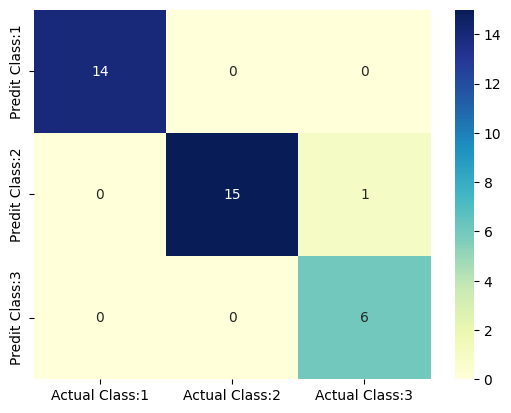

In [406]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Class:1', 'Actual Class:2', 'Actual Class:3'],
                         index=['Predit Class:1', 'Predit Class:2', 'Predit Class:3'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [403]:
# classification metrices
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



In [407]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.84608661, 0.10773965, 0.04617374],
       [0.08048314, 0.04382495, 0.87569191],
       [0.33554459, 0.65481533, 0.00964009],
       [0.80152316, 0.1525236 , 0.04595323],
       [0.22039744, 0.66114073, 0.11846182],
       [0.24522358, 0.74433276, 0.01044366],
       [0.87468447, 0.07438344, 0.05093209],
       [0.03848718, 0.12116596, 0.84034686],
       [0.15948773, 0.78373262, 0.05677965],
       [0.05898538, 0.80051396, 0.14050066]])

In [408]:
# print the first 10 predicted probabilities
logreg.predict_proba(X_test)[0:10, 1]

array([0.10773965, 0.04382495, 0.65481533, 0.1525236 , 0.66114073,
       0.74433276, 0.07438344, 0.12116596, 0.78373262, 0.80051396])

In [409]:
# store the predicted probabilities
y_pred1 = logreg.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequecy')

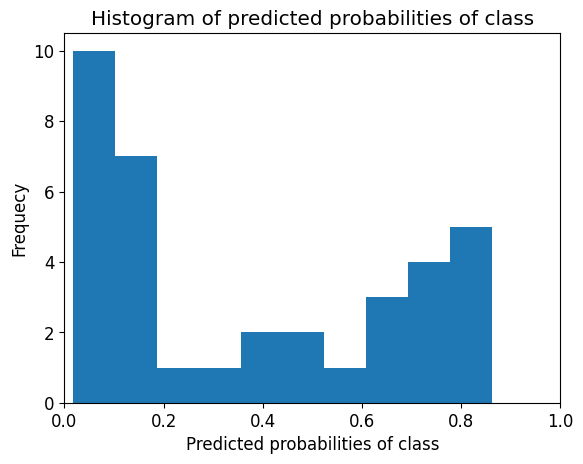

In [411]:
# plot histogram of predicted probabilities
# adjust the font size
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins=10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of class')

# set the x-axis limit
plt.xlim(0,1)

plt.xlabel('Predicted probabilities of class')
plt.ylabel('Frequecy')

In [413]:
# k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.93103448 0.96551724 0.96428571 1.         0.96428571]


In [414]:
# compute Average cross-validation score
score_mean = scores.mean()
print(f'Average cross-validation score: {score_mean}')

Average cross-validation score: 0.9650246305418719


In [415]:
# Hyperparameter Optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty': ['11', '12']},
              {'C':[1, 10, 100, 100]}]

grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['11', '12']}, {'C': [1, 10, 100, 100]}],
             scoring='accuracy')

In [417]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :', '\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :', '\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9650


Parameters that give the best results : 

 {'C': 1}


Estimator that was chosen by the search : 

 LogisticRegression(C=1, random_state=0, solver='liblinear')


In [419]:
# calculate Gridsearch CV score on test set
print('Gridsearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

Gridsearch CV score on test set: 0.9722


## Results and Conclusion

- The logistic regression model accuracy score is 0.9722. Since the value the train sets are above 0.9, we can conclude that the training is accurate on its predictions. Therefore, the model did an excellent work in predicting the class of each columns.